<h1 style="color:DodgerBlue;">Customer Churn Service</h1>

<h1 style="color:DodgerBlue;">Import Libraries</h1>

In [1]:
# Import
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot


<h1 style="color:DodgerBlue;">Load Data</h1>

In [3]:

# load the dataset

df_basedata_train_0 = pd.read_excel(r'C:\ArtistofAnalytics\Projects\Service_Churn\Customer_Churn_Data_Fetch_3.xlsx')
df_basedata_train_0.head()


,CUSTOMER_ID,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,MODEL4,MODEL5,MODEL6,MODEL7,MODEL8,MODEL9,MODEL10,MODEL11,FUEL_TYPE,USED_VEH,ESB_ACTIVE,Latest_Feedback,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
0,Customer1,43,18,6940.05,15,108885,9.470588,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,356.18,615.19,971.37,0
1,Customer2,0,1,0.00,19,2190,13.000000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.00,0.00,0.00,1
2,Customer3,4,2,188.69,14,10985,15.000000,2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,21.54,36.94,58.48,0
3,Customer4,76,22,2824.07,13,122068,17.909091,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,786.68,1956.51,2743.19,0
4,Customer5,39,10,676.35,5,56123,10.600000,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2,2,0,0,1,0,301.36,386.42,687.78,0


<h1 style="color:DodgerBlue;">Exploratory Data Analysis</h1>

In [7]:
df_basedata_train_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74488 entries, 0 to 74487
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CUSTOMER_ID      74488 non-null  object 
 1   TENURE           74488 non-null  int64  
 2   VISITS           74488 non-null  int64  
 3   LIFETIME_SPENT   74488 non-null  float64
 4   ABSENCE          74488 non-null  int64  
 5   DRIVE_LIFE       74488 non-null  int64  
 6   SERVICE_TIME     74488 non-null  float64
 7   VEHICLE_AGE      74488 non-null  int64  
 8   MODEL1           74488 non-null  int64  
 9   MODEL2           74488 non-null  int64  
 10  MODEL3           74488 non-null  int64  
 11  MODEL4           74488 non-null  int64  
 12  MODEL5           74488 non-null  int64  
 13  MODEL6           74488 non-null  int64  
 14  MODEL7           74488 non-null  int64  
 15  MODEL8           74488 non-null  int64  
 16  MODEL9           74488 non-null  int64  
 17  MODEL10     

In [8]:
df_basedata_train_0.describe()

,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,MODEL4,MODEL5,MODEL6,MODEL7,MODEL8,MODEL9,MODEL10,MODEL11,FUEL_TYPE,USED_VEH,ESB_ACTIVE,Latest_Feedback,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
count,74488.000000,74488.000000,74488.000000,74488.000000,74488.00000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000
mean,29.891607,7.496563,1015.909142,11.883337,48024.50592,26.044397,4.386720,0.130008,0.004430,0.011801,0.087611,0.462383,0.215270,0.068964,0.000067,0.018177,0.000134,0.001155,0.656079,0.006525,0.223835,0.168698,0.422833,0.724587,0.548303,0.244549,0.066521,0.140627,243.167778,470.548863,713.716641,0.260955
std,25.568569,7.016909,1891.727409,10.314209,47348.28230,21.802303,3.053363,0.336314,0.066413,0.107988,0.282731,0.498586,0.411012,0.253395,0.008193,0.133594,0.011586,0.033959,0.475018,0.080511,0.416815,0.720839,0.838243,1.165042,0.497665,0.429823,0.249192,0.347638,343.093383,829.669711,1103.674212,0.439158
min,0.000000,1.000000,-2122.970000,0.000000,0.00000,-3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-484.020000,0.000000,-484.020000,0.000000
25%,5.000000,2.000000,101.110000,3.000000,15177.00000,12.625000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.540000,45.680000,88.847500,0.000000
50%,26.000000,5.000000,372.695000,8.000000,38694.50000,19.285714,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,121.150000,185.280000,324.985000,0.000000
75%,51.000000,10.000000,1064.182500,19.000000,69339.25000,34.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,320.182500,564.455000,900.942500,1.000000
max,89.000000,105.000000,31942.540000,36.000000,999999.00000,164.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,21.000000,1.000000,1.000000,1.000000,1.000000,6648.970000,29160.800000,32040.190000,1.000000


Text(0.5, 1.0, 'df_basedata_train_0')

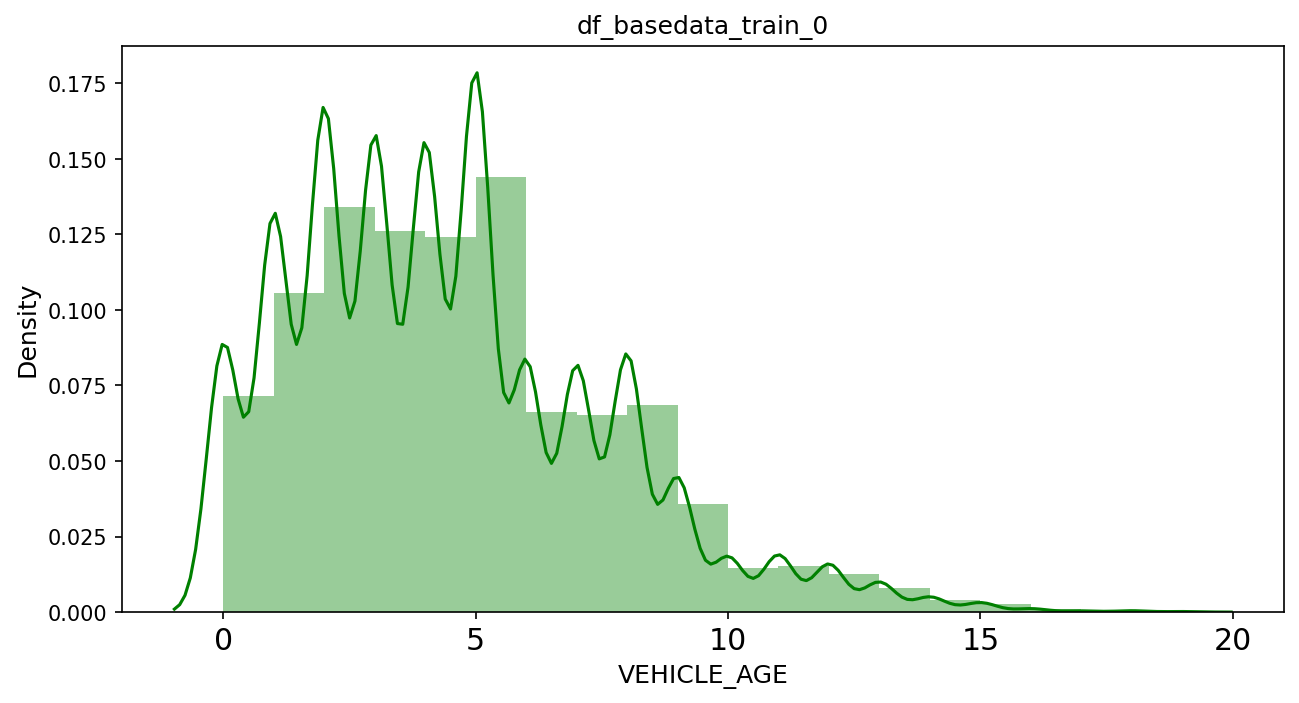

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(df_basedata_train_0['VEHICLE_AGE'], bins=19, color='g').set_title('df_basedata_train_0')

In [10]:
df_basedata_train_0[df_basedata_train_0['DRIVE_LIFE']>900000].head()

,CUSTOMER_ID,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,MODEL4,MODEL5,MODEL6,MODEL7,MODEL8,MODEL9,MODEL10,MODEL11,FUEL_TYPE,USED_VEH,ESB_ACTIVE,Latest_Feedback,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
12975,Customer12976,3,2,147.79,8,900175,12.000000,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,11.73,136.06,147.79,0
19623,Customer19624,80,22,5226.88,8,901089,22.000000,11,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,3,1,0,0,0,1163.17,4051.86,5215.03,0
34013,Customer34014,66,16,2217.41,17,996108,14.769231,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,461.93,1775.59,2237.52,0
36393,Customer36394,85,27,2724.39,4,933940,21.909091,7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,3,1,0,0,0,776.37,1966.79,2743.16,0
37512,Customer37513,30,16,1614.09,29,992987,20.000000,9,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,596.12,1019.38,1615.50,1


In [11]:
# data size
print("Train Data Size: ", df_basedata_train_0.shape)

Train Data Size:  (74488, 33)


In [12]:
# Show if any NAN data
df_basedata_train_0.isnull().sum()

CUSTOMER_ID        0
TENURE             0
VISITS             0
LIFETIME_SPENT     0
ABSENCE            0
DRIVE_LIFE         0
SERVICE_TIME       0
VEHICLE_AGE        0
MODEL1             0
MODEL2             0
MODEL3             0
MODEL4             0
MODEL5             0
MODEL6             0
MODEL7             0
MODEL8             0
MODEL9             0
MODEL10            0
MODEL11            0
FUEL_TYPE          0
USED_VEH           0
ESB_ACTIVE         0
Latest_Feedback    0
Dissatisfied       0
Satisfied          0
North              0
South              0
East               0
West               0
LBR_COST           0
All_PRTS           0
Total_Spent        0
Churn              0
dtype: int64

In [13]:
df_basedata_train_1 = df_basedata_train_0.copy()

In [14]:
df_basedata_train_1.drop(['CUSTOMER_ID'], axis=1, inplace=True)

In [15]:
df_basedata_train_1.head()

,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,MODEL4,MODEL5,MODEL6,MODEL7,MODEL8,MODEL9,MODEL10,MODEL11,FUEL_TYPE,USED_VEH,ESB_ACTIVE,Latest_Feedback,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
0,43,18,6940.05,15,108885,9.470588,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,356.18,615.19,971.37,0
1,0,1,0.00,19,2190,13.000000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.00,0.00,0.00,1
2,4,2,188.69,14,10985,15.000000,2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,21.54,36.94,58.48,0
3,76,22,2824.07,13,122068,17.909091,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,786.68,1956.51,2743.19,0
4,39,10,676.35,5,56123,10.600000,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2,2,0,0,1,0,301.36,386.42,687.78,0


In [16]:
df_basedata_train_1.shape

(74488, 32)

In [17]:
type(df_basedata_train_1)

pandas.core.frame.DataFrame

<AxesSubplot:>

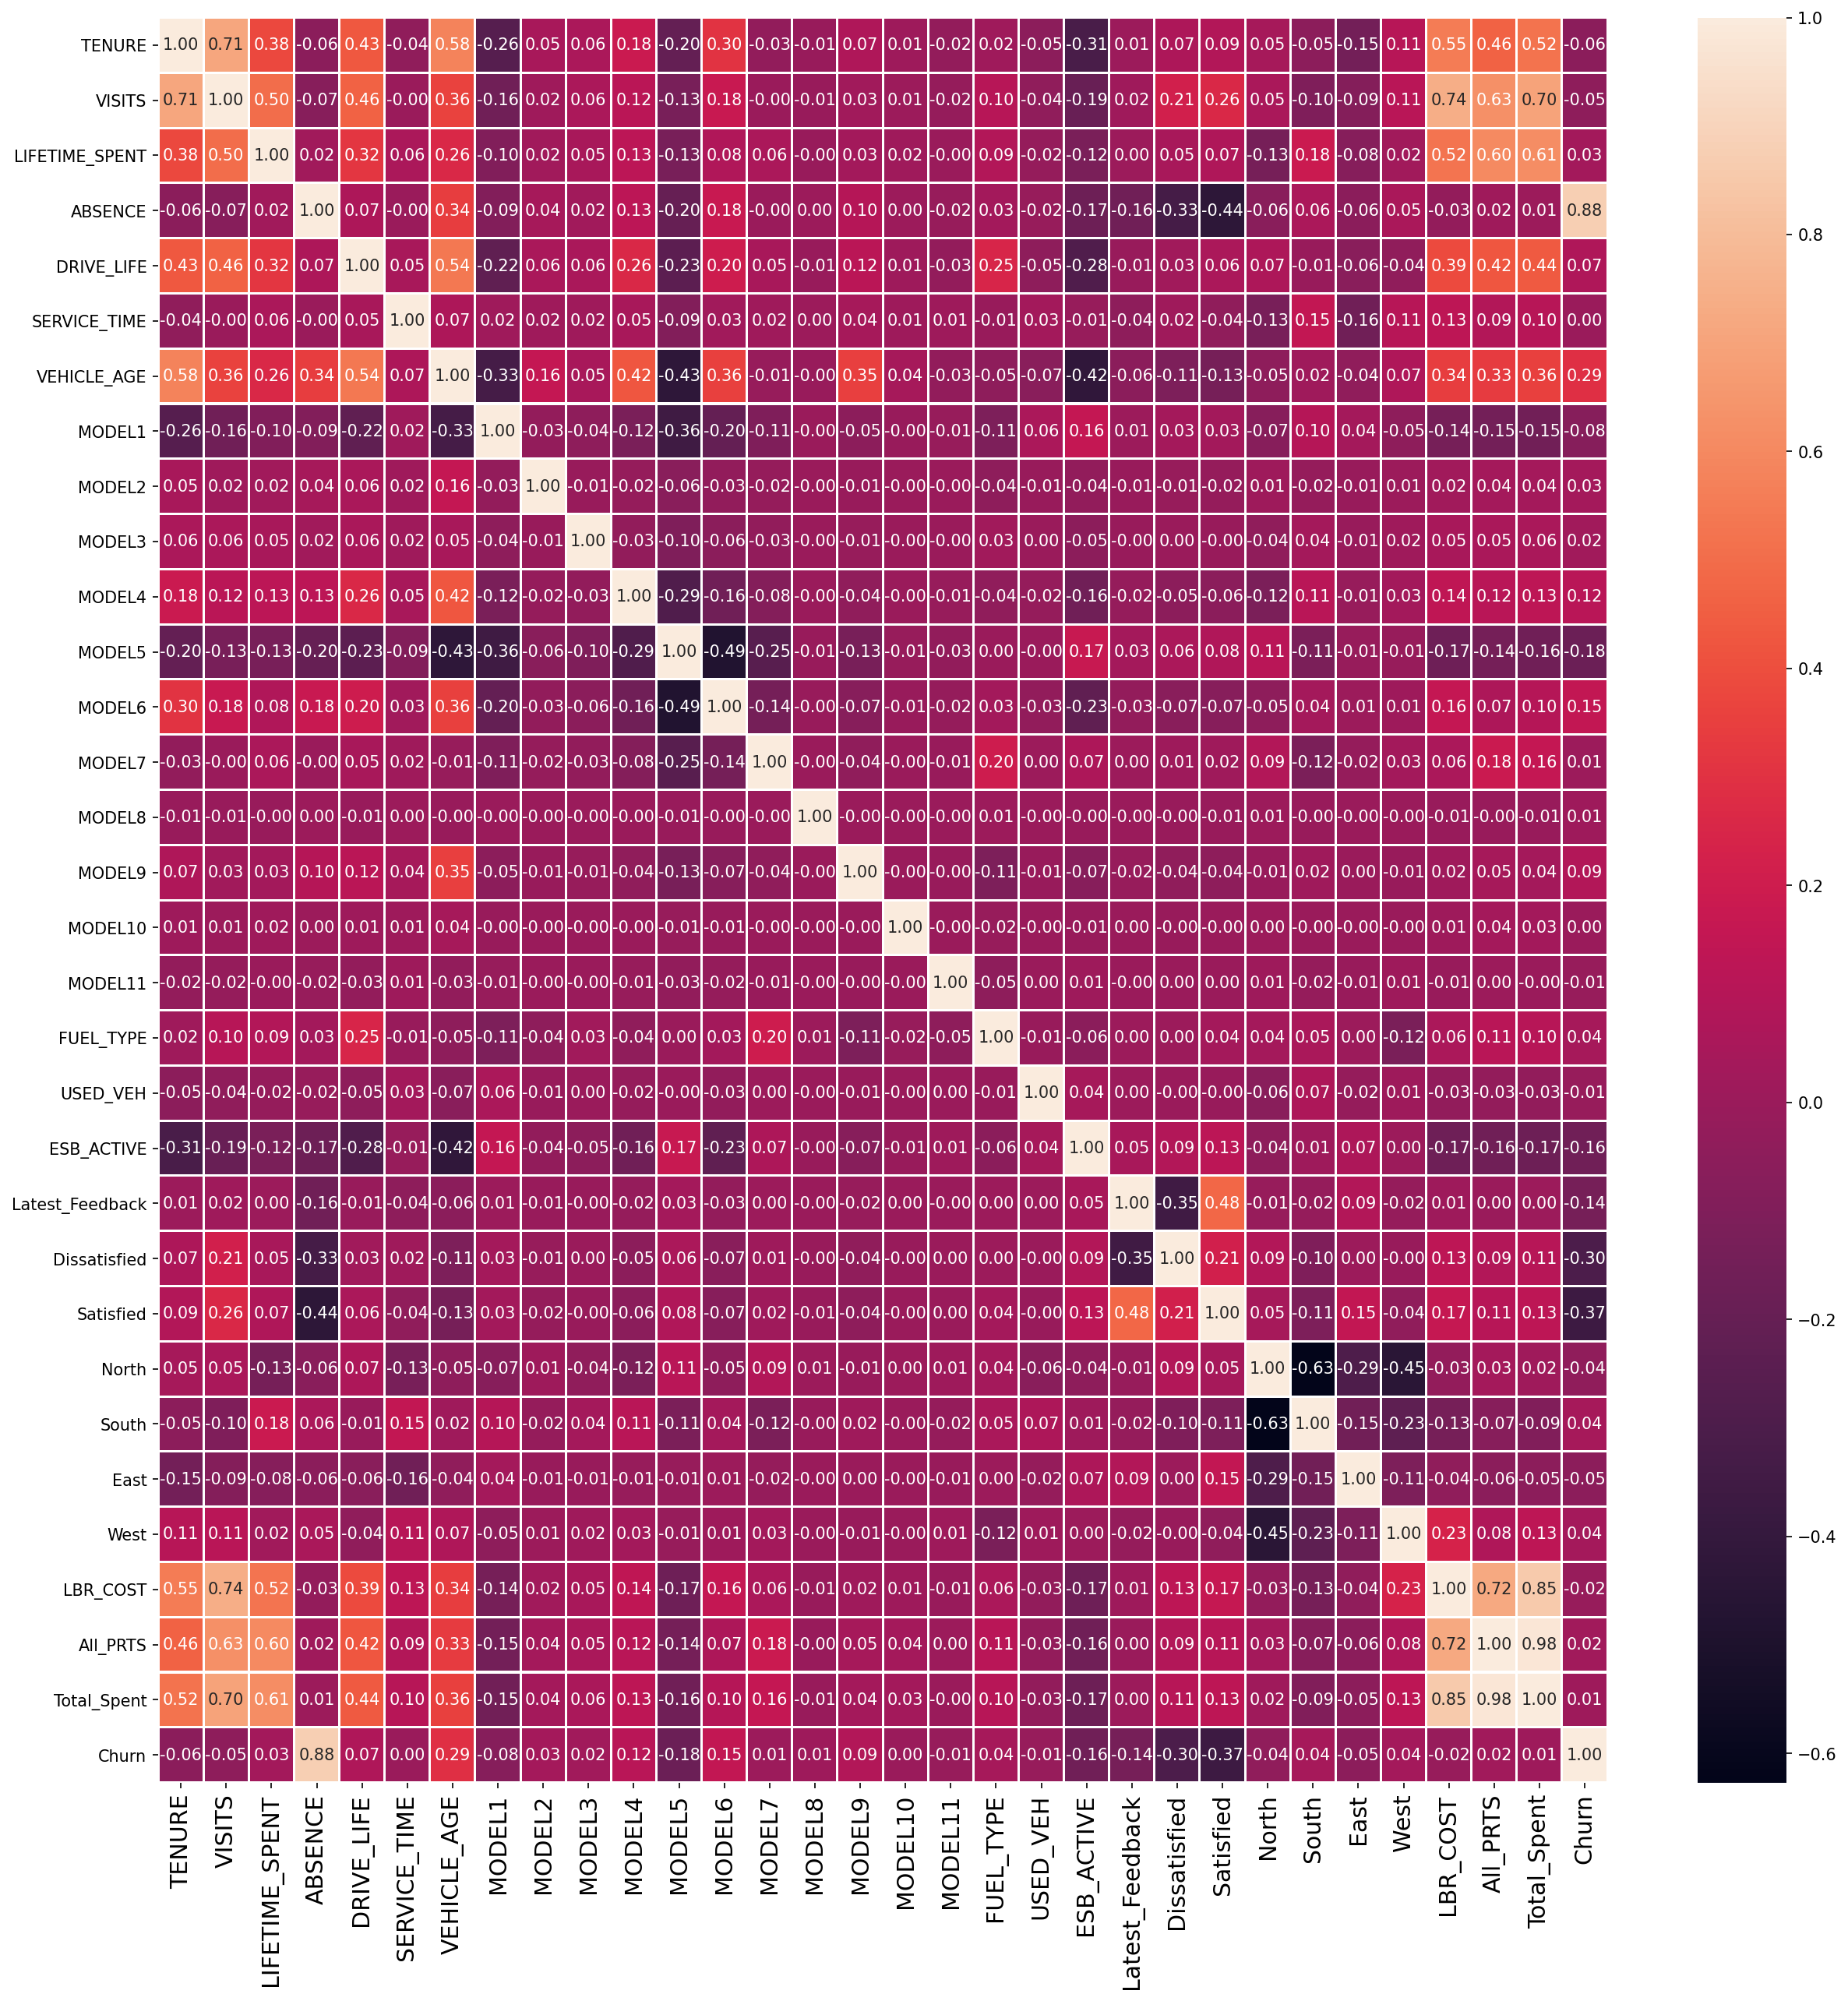

In [18]:

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_basedata_train_1.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax)
#ax.set_ylim(10, 0)

In [19]:
modeling_data = df_basedata_train_1.iloc[:60000]
validate_data = df_basedata_train_1.iloc[60000:]

In [20]:
modeling_data.head()

,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,MODEL4,MODEL5,MODEL6,MODEL7,MODEL8,MODEL9,MODEL10,MODEL11,FUEL_TYPE,USED_VEH,ESB_ACTIVE,Latest_Feedback,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
0,43,18,6940.05,15,108885,9.470588,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,356.18,615.19,971.37,0
1,0,1,0.00,19,2190,13.000000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.00,0.00,0.00,1
2,4,2,188.69,14,10985,15.000000,2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,21.54,36.94,58.48,0
3,76,22,2824.07,13,122068,17.909091,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,786.68,1956.51,2743.19,0
4,39,10,676.35,5,56123,10.600000,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2,2,0,0,1,0,301.36,386.42,687.78,0


In [21]:
modeling_data.shape

(60000, 32)

In [22]:
validate_data.shape

(14488, 32)

In [23]:
type(modeling_data)

pandas.core.frame.DataFrame

<h1 style="color:DodgerBlue;">Data Preparation</h1>

In [24]:
# Machine Learning 

X = modeling_data.drop("Churn", axis=1)
y = modeling_data["Churn"]

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


In [26]:
# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [31]:
#modeling_data

# Machine Learning 
FI_predictor = modeling_data.drop(['Churn'], 1)
FI_target = modeling_data['Churn']

In [32]:
FI_predictor.head()

,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,MODEL4,MODEL5,MODEL6,MODEL7,MODEL8,MODEL9,MODEL10,MODEL11,FUEL_TYPE,USED_VEH,ESB_ACTIVE,Latest_Feedback,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent
0,43,18,6940.05,15,108885,9.470588,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,356.18,615.19,971.37
1,0,1,0.00,19,2190,13.000000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.00,0.00,0.00
2,4,2,188.69,14,10985,15.000000,2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,21.54,36.94,58.48
3,76,22,2824.07,13,122068,17.909091,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,786.68,1956.51,2743.19
4,39,10,676.35,5,56123,10.600000,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2,2,0,0,1,0,301.36,386.42,687.78


<AxesSubplot:ylabel='feature'>

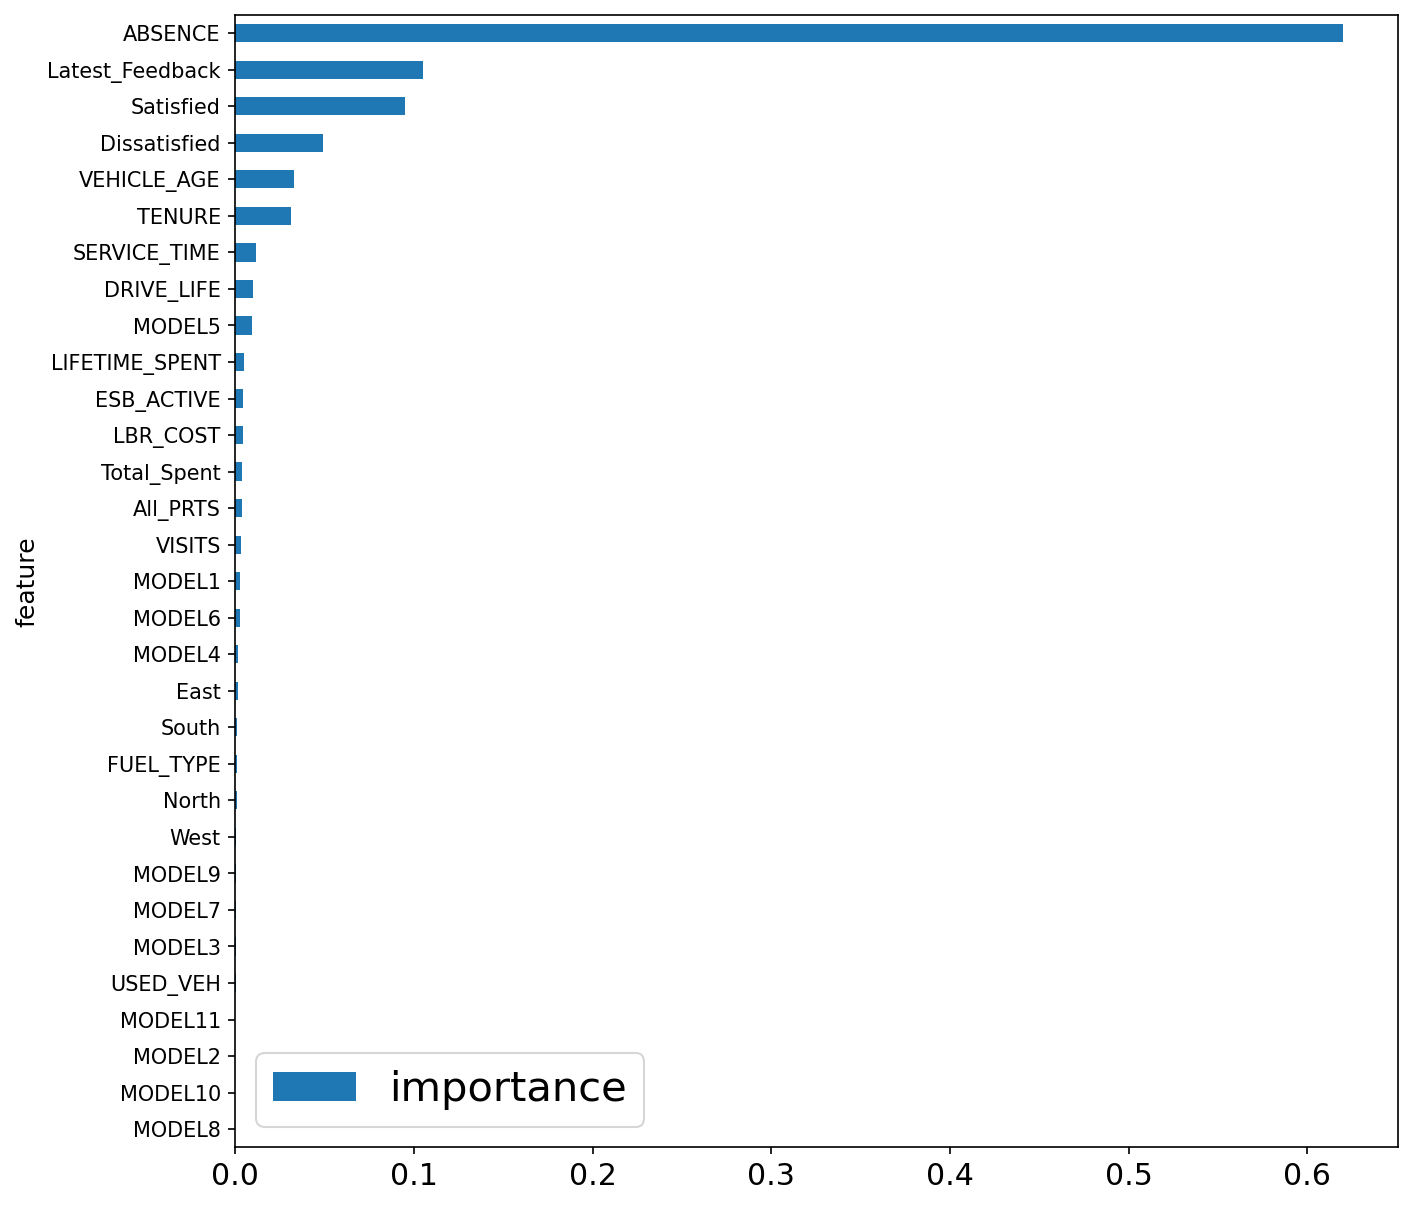

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(FI_predictor, FI_target)

#have a look at the importance of each feature.
features = pd.DataFrame()
features['feature'] = FI_predictor.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 10))

In [34]:
modeling_data_2 = modeling_data.copy()

In [35]:
modeling_data_2.head()

,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,MODEL4,MODEL5,MODEL6,MODEL7,MODEL8,MODEL9,MODEL10,MODEL11,FUEL_TYPE,USED_VEH,ESB_ACTIVE,Latest_Feedback,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
0,43,18,6940.05,15,108885,9.470588,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,356.18,615.19,971.37,0
1,0,1,0.00,19,2190,13.000000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.00,0.00,0.00,1
2,4,2,188.69,14,10985,15.000000,2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,21.54,36.94,58.48,0
3,76,22,2824.07,13,122068,17.909091,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,786.68,1956.51,2743.19,0
4,39,10,676.35,5,56123,10.600000,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2,2,0,0,1,0,301.36,386.42,687.78,0


In [36]:
modeling_data_2.drop(['ABSENCE'], axis=1, inplace=True)

In [37]:
modeling_data_2.head()

,TENURE,VISITS,LIFETIME_SPENT,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,MODEL4,MODEL5,MODEL6,MODEL7,MODEL8,MODEL9,MODEL10,MODEL11,FUEL_TYPE,USED_VEH,ESB_ACTIVE,Latest_Feedback,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
0,43,18,6940.05,108885,9.470588,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,356.18,615.19,971.37,0
1,0,1,0.00,2190,13.000000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.00,0.00,0.00,1
2,4,2,188.69,10985,15.000000,2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,21.54,36.94,58.48,0
3,76,22,2824.07,122068,17.909091,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,786.68,1956.51,2743.19,0
4,39,10,676.35,56123,10.600000,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2,2,0,0,1,0,301.36,386.42,687.78,0


In [38]:
#modeling_data

# Machine Learning 
predictor2 = modeling_data_2.drop(['Churn'], 1)
target2 = modeling_data_2['Churn']

<AxesSubplot:ylabel='feature'>

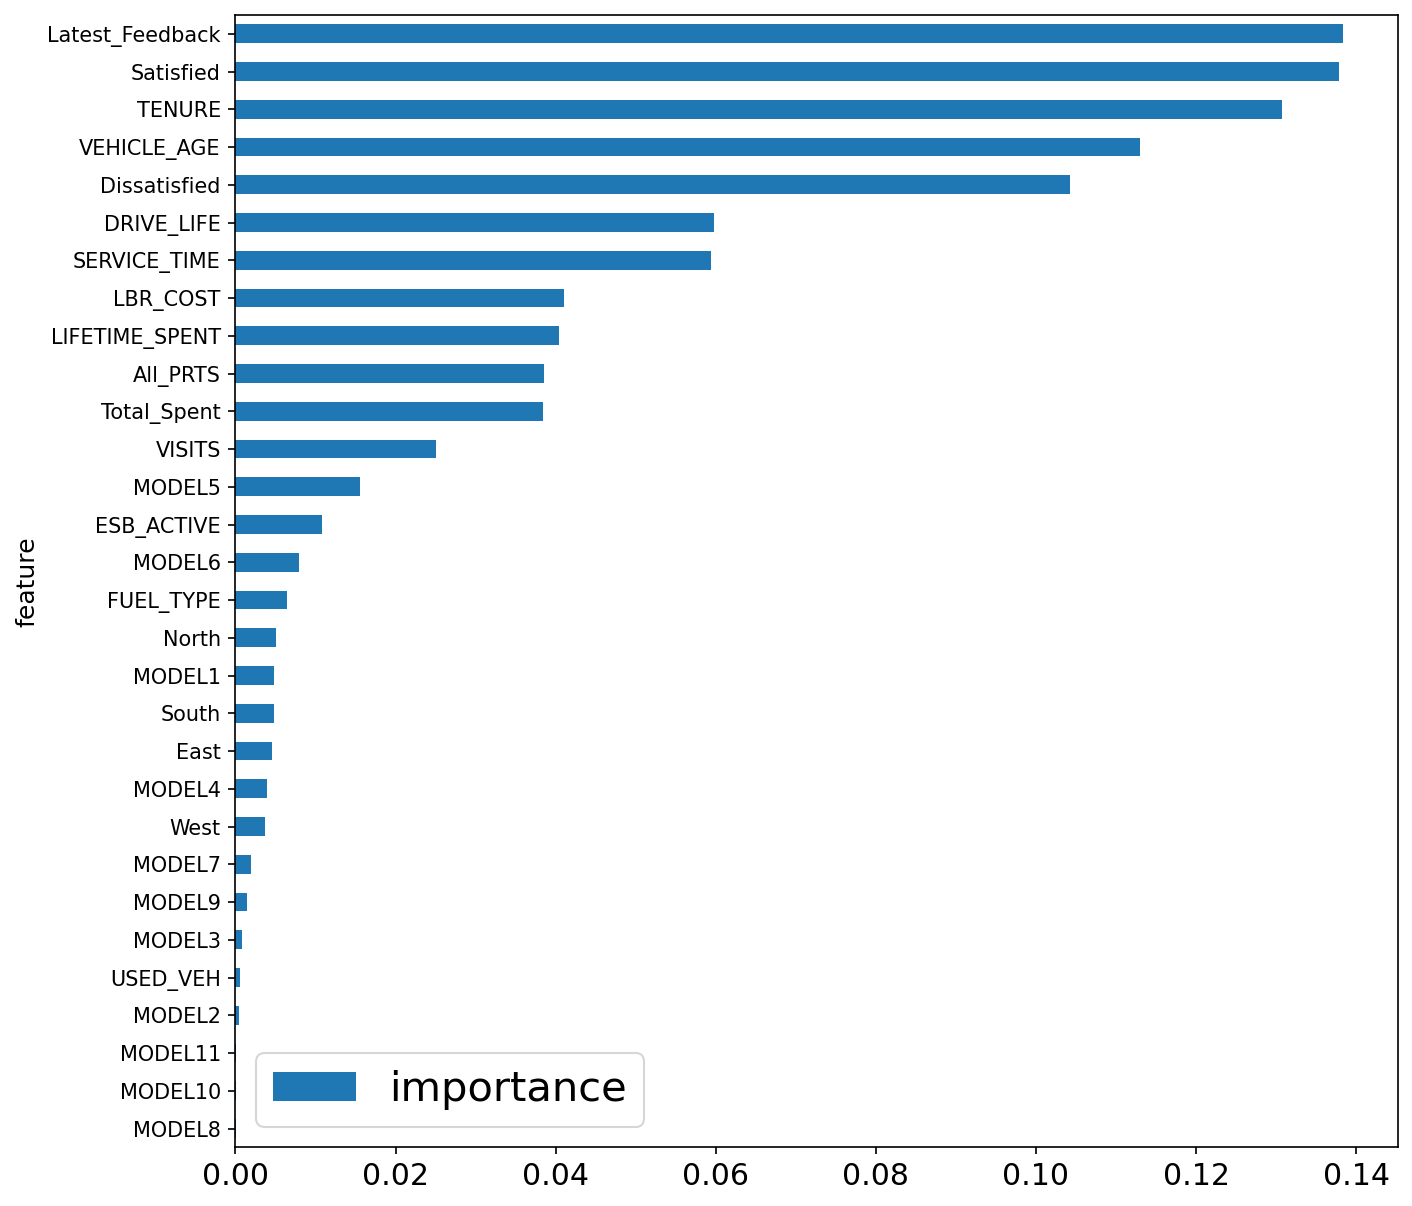

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(predictor2, target2)

#have a look at the importance of each feature.
features = pd.DataFrame()
features['feature'] = predictor2.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 10))

<h1 style="color:DodgerBlue;">Create Base Model</h1>

In [43]:

# No Normalization

# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(predictor2, target2, test_size=0.25, random_state=0)


#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("GB Accuracy:",metrics.accuracy_score(y_test, y_pred))


## Lets call logistic regression
#Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print ("Logistic Regression Accuracy: {}".format(round(accuracy_score(y_test,y_pred),4)))


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
naivebayespred = gnb.predict(X_test)
print ("Naive Bayes Accuracy: {}".format(round(accuracy_score(y_test,naivebayespred),8)))


GB Accuracy: 0.9270666666666667
Logistic Regression Accuracy: 0.7427
Naive Bayes Accuracy: 0.7628


<h1 style="color:DodgerBlue;">Create Advance Models</h1>

[20:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    Algo  Accuracy  execution_time
0    KNN    0.6961            2.71
1    SVC    0.7368           58.57
2     LR    0.7377            0.35
3     NB    0.7518            0.08
4  Dtree    0.9039            0.40
5     RF    0.9246            5.98
6    XGB    0.9301            2.63


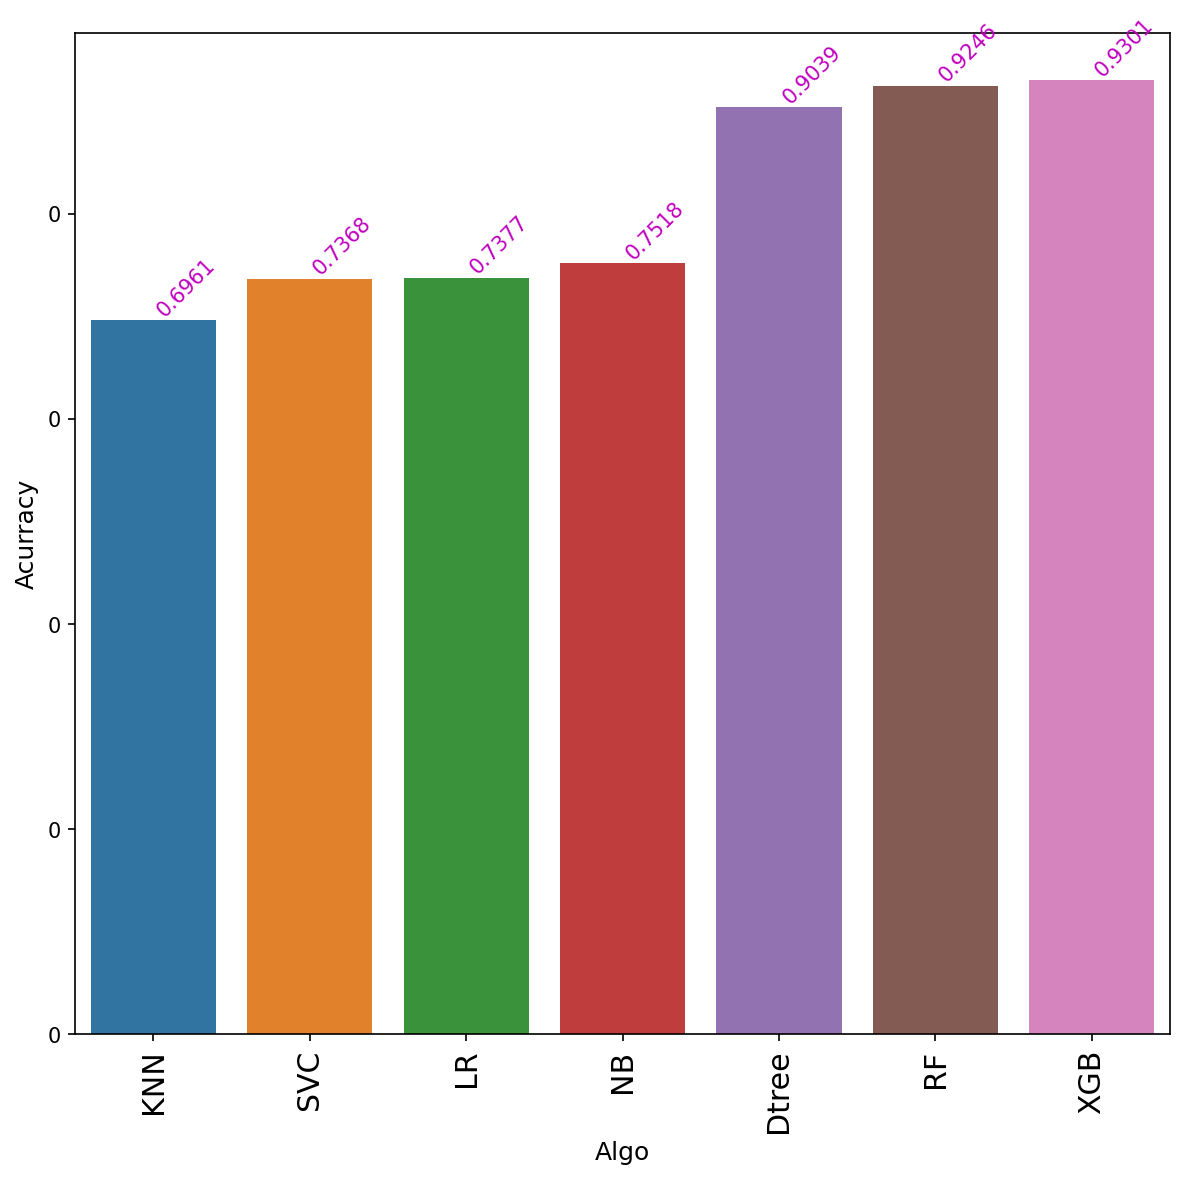

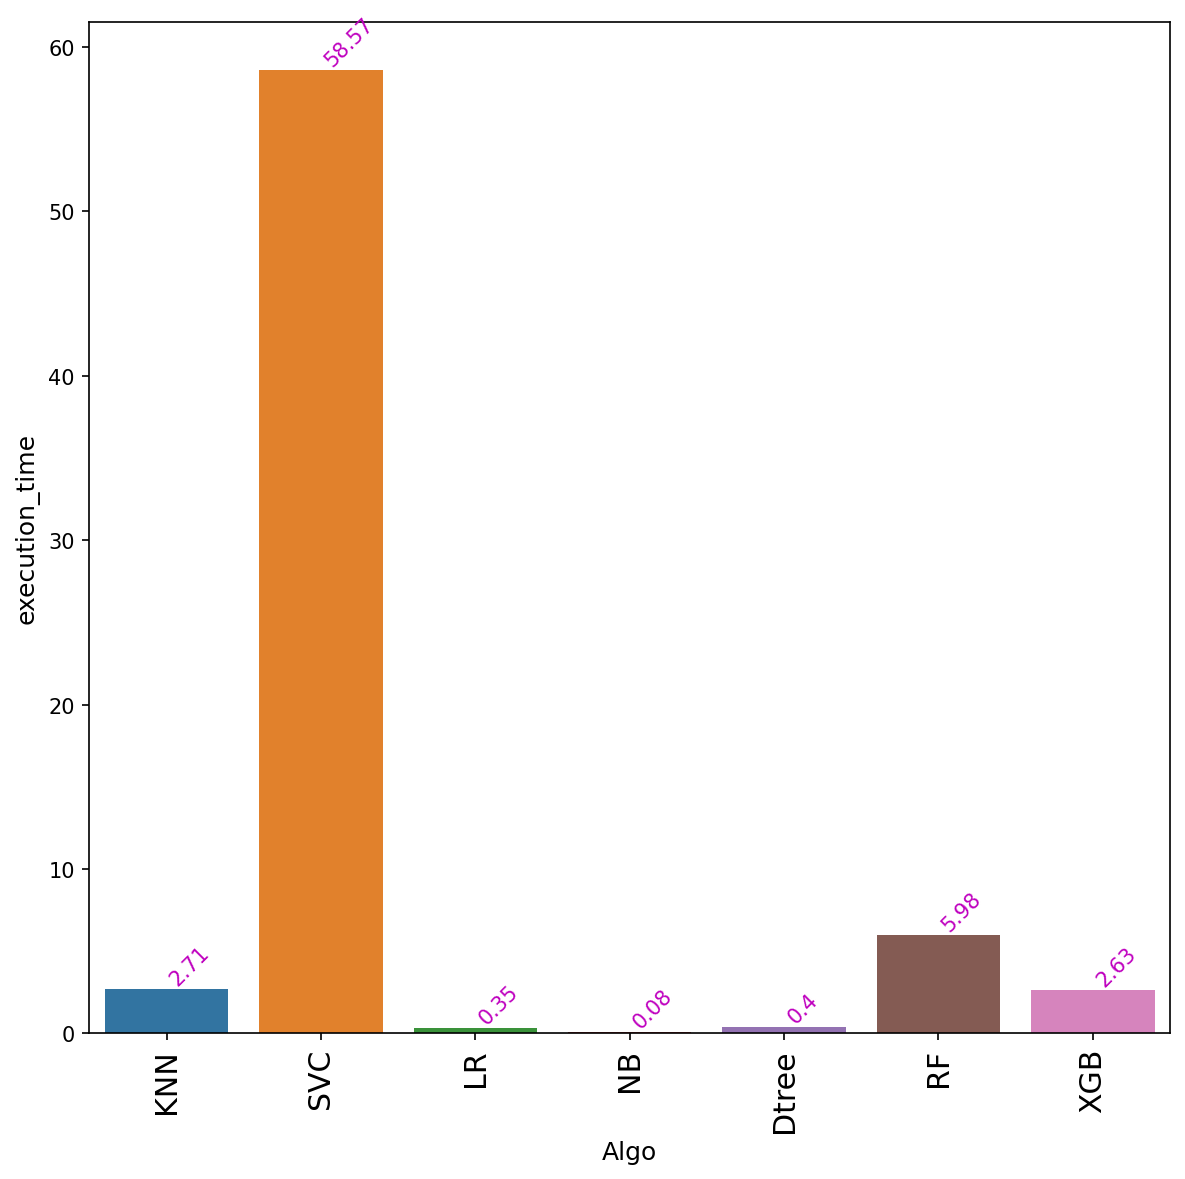

In [42]:
# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(predictor2, target2, test_size=0.25, random_state=0)


from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import time

#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

result = []
#measure the accuracy 
for name,model in models:
    start_time = time.time()
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    #print(name, cv_result)
    #print("-"*5,name, " Mean accuracy of cross-validation: ", format(round(cv_result.mean(),4)))
    execution_time = (time.time() - start_time)
    result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))
    #print(name,"--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(result)
    
df = pd.DataFrame(result, columns =['Algo', 'Accuracy', 'execution_time']) 
df 

# sort df by Count column
pd_df = df.sort_values(['f1']).reset_index(drop=True)
print (pd_df)


plt.figure(figsize=(8,8))
# plot bar chart with index as x values
ax = sns.barplot(pd_df.index, pd_df.Accuracy)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Algo", ylabel="Accuracy")
# add proper Dim values as x labels

ax.set_xticklabels(pd_df.Algo)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(pd_df["Accuracy"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,8))
# plot bar chart with index as x values
ax = sns.barplot(pd_df.index, pd_df.execution_time)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Algo", ylabel="execution_time")
# add proper Dim values as x labels

ax.set_xticklabels(pd_df.Algo)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(pd_df["execution_time"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()


In [44]:

#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

result = []
#measure the accuracy 
for name,model in models:
    start_time = time.time()
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "f1")
    #print(name, cv_result)
    #print("-"*5,name, " Mean accuracy of cross-validation: ", format(round(cv_result.mean(),4)))
    execution_time = (time.time() - start_time)
    result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))
    #print(name,"--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(result)
    
df = pd.DataFrame(result, columns =['Algo', 'f1', 'execution_time']) 
df 

# sort df by Count column
pd_df = df.sort_values(['f1']).reset_index(drop=True)
print (pd_df)



[20:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    Algo      f1  execution_time
0    SVC  0.0019           59.47
1     LR  0.1621            0.44
2    KNN  0.2320            2.47
3     NB  0.4297            0.10
4  Dtree  0.8171            0.42
5     RF  0.8647            6.35
6    XGB  0.8711            2.79


In [45]:

#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

result = []
#measure the accuracy 
for name,model in models:
    start_time = time.time()
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "roc_auc")
    #print(name, cv_result)
    #print("-"*5,name, " Mean accuracy of cross-validation: ", format(round(cv_result.mean(),4)))
    execution_time = (time.time() - start_time)
    result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))
    #print(name,"--- %s seconds ---" % (time.time() - start_time))

pd.DataFrame(result)
    
df = pd.DataFrame(result, columns =['Algo', 'roc_auc', 'execution_time']) 
df 

# sort df by Count column
pd_df = df.sort_values(['roc_auc']).reset_index(drop=True)
print (pd_df)



[20:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    Algo  roc_auc  execution_time
0    SVC   0.4981           60.28
1    KNN   0.5551            1.20
2     LR   0.5676            0.44
3     NB   0.8319            0.09
4  Dtree   0.8745            0.44
5     RF   0.9721            6.03
6    XGB   0.9785            2.72


<h1 style="color:DodgerBlue;">Hyper Parameter Optimization</h1>

<h1 style="color:DodgerBlue;">Conclusion</h1>